# Lab 5 - Regression Task


#### Dependencies:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import scale

## DataSet

In [2]:
x_train=np.load('./Real_Estate_Xtrain.npy')
y_train=np.load('./Real_Estate_ytrain.npy')
x_test=np.load('./Real_Estate_Xtest.npy')
y_test=np.load('./Real_Estate_ytest.npy')
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape, "x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (404, 13) y_train shape: (404,) x_test shape: (102, 13) y_test shape: (102,)


#### Normalization

In [3]:
scale(x_train);
scale(y_train);
scale(x_test);
scale(y_test);

#### Splitting

In [4]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [5]:
x_train=np.expand_dims(x_train,axis=2)
x_test=np.expand_dims(x_test,axis=2)
x_validation=np.expand_dims(x_validation,axis=2)
print("x_train shape:", x_train.shape, "x_test shape:", x_test.shape,"x_validation shape:", x_validation.shape)

x_train shape: (363, 13, 1) x_test shape: (102, 13, 1) x_validation shape: (41, 13, 1)


# NN MSE

In [6]:
model = tf.keras.Sequential(name="MSE_Price_Guess")
model.add(tf.keras.layers.Flatten(input_shape=(13, 1)))
model.add(tf.keras.layers.Dense(32, activation="relu", name="Dense_32"))
model.add(tf.keras.layers.Dense(64, activation="relu", name="Dense_64"))
model.add(tf.keras.layers.Dense(128, activation="relu", name="Dense_128"))
model.add(tf.keras.layers.Dense(256, activation="relu", name="Dense_256"))
model.add(tf.keras.layers.Dense(512, activation="relu", name="Dense_512"))
model.add(tf.keras.layers.Dense(1, name="Output"))

In [7]:
model.summary()

Model: "MSE_Price_Guess"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 13)                0         
_________________________________________________________________
Dense_32 (Dense)             (None, 32)                448       
_________________________________________________________________
Dense_64 (Dense)             (None, 64)                2112      
_________________________________________________________________
Dense_128 (Dense)            (None, 128)               8320      
_________________________________________________________________
Dense_256 (Dense)            (None, 256)               33024     
_________________________________________________________________
Dense_512 (Dense)            (None, 512)               131584    
_________________________________________________________________
Output (Dense)               (None, 1)             

In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001,clipnorm=1)
model.compile(optimizer=opt, loss="mse")
history=model.fit(x=x_train,y=y_train,epochs=500,batch_size=363,validation_data=(x_validation,y_validation),verbose=0)

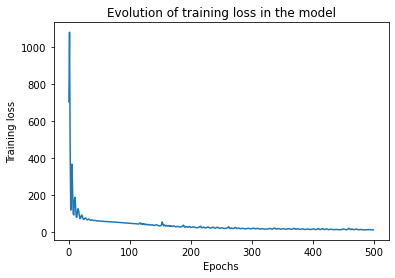

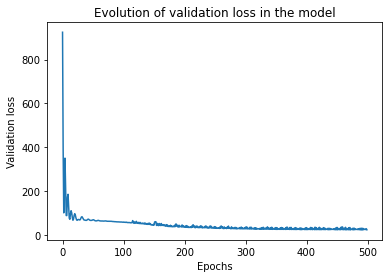

In [9]:
plt.plot(history.history['loss'])
plt.title('Evolution of training loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.savefig("mse_train_loss.png")
plt.show()
plt.plot(history.history['val_loss'])
plt.title('Evolution of validation loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.savefig("mse_val_loss.png")
plt.show()

### Prediction 

In [10]:
y_prediction_buffer=model.predict(x=x_test,batch_size=363)
y_prediction =y_prediction_buffer.flatten() 

## Performance Analysis

In [11]:
print("Sum Square Error score:", np.sum((y_test-y_prediction)**2)/y_test.shape[0])
print("Mean Square Root score:", sqrt(mean_squared_error(y_test, y_prediction)))
print("Minimum Error score:", np.ndarray.min(np.absolute(y_test-y_prediction)))
print("Maximum Error score:", np.ndarray.max(np.absolute(y_test-y_prediction)))

Sum Square Error score: 15.81236371334186
Mean Square Root score: 3.9764762935722198
Minimum Error score: 0.010837173461915484
Maximum Error score: 14.95799522399902


## 
# Lasso and LS Model

##### DataSet Reset

In [12]:
x_train=np.load('./Real_Estate_Xtrain.npy')
y_train=np.load('./Real_Estate_ytrain.npy')
x_test=np.load('./Real_Estate_Xtest.npy')
y_test=np.load('./Real_Estate_ytest.npy')
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape, "x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (404, 13) y_train shape: (404,) x_test shape: (102, 13) y_test shape: (102,)


##### Normalize

In [13]:
scale(x_train);
scale(y_train);
scale(x_test);
scale(y_test);

##### Splitting

In [14]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

## Lasso Model Setup

In [16]:
alphas=np.arange(10e-3, 10, 10e-3)  #set alphas

#set maximum iterations
lasso_model = Lasso(max_iter=10000,fit_intersect=true)

lasso_coefficients = None

for alpha in alphas:
    #set model alpha
    lasso_model.alpha = alpha
    #fit the model with the data
    lasso_model.fit(x_train, y_train)
    
    #obtain the coefficients of the models
    lasso_coef = np.expand_dims(lasso_model.coef_, 0)

    if type(lasso_coefficients) != np.ndarray:
        lasso_coefficients = lasso_coef
    else:
        lasso_coefficients = np.concatenate((lasso_coefficients, lasso_coef), axis=0)


## LS Model Fitting

In [17]:
LS_model = LinearRegression()   #instanciate Linear regression model
LS_model.fit(x_train, y_train)   #fit data on the model

#create lines of the coefficients of the LS model to be ploted against the coefficients of the Lasso model
c1 = np.ones(len(alphas)) * LS_model.coef_[0]
c2 = np.ones(len(alphas)) * LS_model.coef_[0]
c3 = np.ones(len(alphas)) * LS_model.coef_[0]

#### Plotting

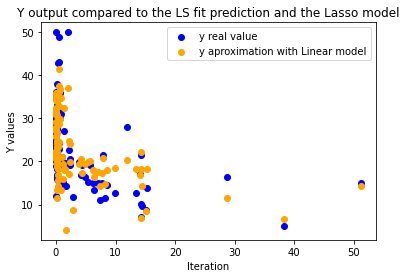

In [51]:
l = np.linspace(0, x_train.shape[0]-1, x_train.shape[0])
l = x_train

best_alpha=np.ndarray.min(lasso_coefficients)

#adjust the lasso model for the new parameters
lasso_model.alpha = best_alpha
lasso_model.fit(x_train, y_train)
lasso_values = lasso_model.predict(x_test)

#adjust the ls model
LS_model.fit(x_train, y_train)
LS_values = LS_model.predict(x_test)

#plot 
plt.scatter(x_test[:,0], y_test, color="blue",label='y real value')
#plt.scatter(x_test[:,0], lasso_values, color="red",label='y aproximation with Lasso model')
plt.scatter(x_test[:,0], LS_values, color="orange",label='y aproximation with Linear model')
plt.xlabel('Iteration')
plt.ylabel('Y values')
plt.title('Y output compared to the LS fit prediction and the Lasso model')
plt.legend()
plt.savefig("Lasso.png")
plt.show()

## Performance Analysis

#### LS Performance

In [43]:
print("Sum Square Error score:", np.sum((y_test-LS_values)**2)/y_test.shape[0])
print("Mean Square Root score:", sqrt(mean_squared_error(y_test, LS_values)))
print("Minimum Error score:", np.ndarray.min(np.absolute(y_test-LS_values)))
print("Maximum Error score:", np.ndarray.max(np.absolute(y_test-LS_values)))

Sum Square Error score: 18.958695221464936
Mean Square Root score: 4.3541583826802785
Minimum Error score: 0.06305450036161275
Maximum Error score: 13.997256785224323


#### Lasso Performance

In [47]:
print("Sum Square Error score:", np.sum((y_test-lasso_values)**2)/y_test.shape[0])
print("Mean Square Root score:", sqrt(mean_squared_error(y_test, lasso_values)))
print("Minimum Error score:", np.ndarray.min(np.absolute(y_test-lasso_values)))
print("Maximum Error score:", np.ndarray.max(np.absolute(y_test-lasso_values)))

Sum Square Error score: 93225.96412218701
Mean Square Root score: 305.32927164323274
Minimum Error score: 0.7960852801161309
Maximum Error score: 803.0398976670261
